## Imports

In [27]:
import os 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## List all codes of products for which opinions have been collected

In [4]:
print(*[filename.split(",")[0] for filename in os.listdir("opinions")], sep="\n")

108290707.json
58502455.json


## Enter code of product aboutt which opinions are to be analyzed


In [6]:
product_id = input("Enter product code: ")

# Reading opinions from JSON file to pandas.DataFrame

In [17]:
max_score = 5
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.score = opinions.score.apply(lambda s: round(s*max_score, 1))

## Basic Statistics

In [18]:

opinion_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_score = (opinions.score.mean()).round(3)
average_score

4.178

## Basic Charts

### Opiopns score histogram

[Text(0, 0, '0.0'),
 Text(1, 0, '0.5'),
 Text(2, 0, '1.0'),
 Text(3, 0, '1.5'),
 Text(4, 0, '2.0'),
 Text(5, 0, '2.5'),
 Text(6, 0, '3.0'),
 Text(7, 0, '3.5'),
 Text(8, 0, '4.0'),
 Text(9, 0, '4.5'),
 Text(10, 0, '5.0')]

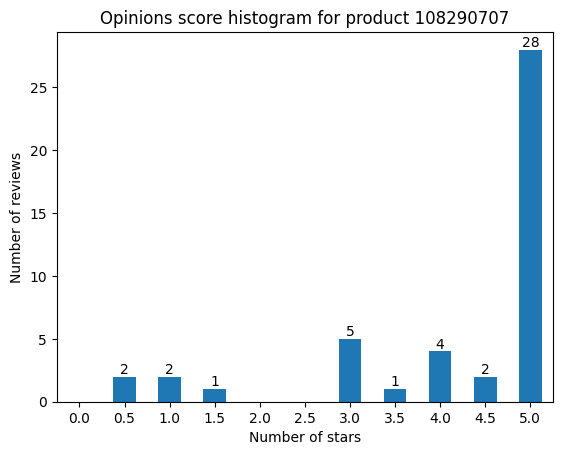

In [30]:
score_distribution = opinions.score.value_counts().sort_index().reindex(np.arange(0,5.5,0.5))
fig, ax = plt.subplots()
score_distribution.plot.bar()
ax.bar_label(ax.containers[0], label_type='edge', fmt=lambda l: int(l) if l > 0 else '')
ax.set_xlabel("Number of stars")
ax.set_ylabel("Number of reviews")
ax.set_title(f"Opinions score histogram for product {product_id}")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0)

## Opinions recommendation share

Text(0.5, 1.0, 'Opinions recommendation share for product 108290707')

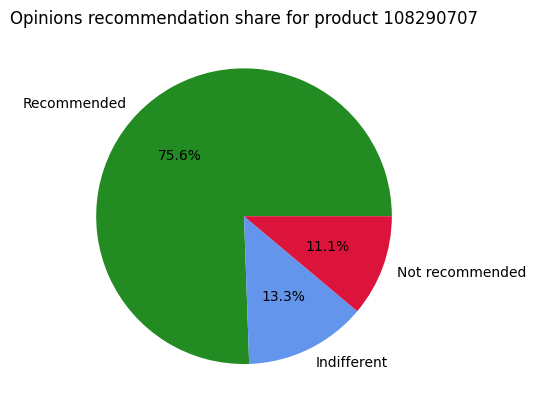

In [47]:
recommendation_distribution = opinions.authors_recommendation.value_counts(dropna=False).reindex([1,np.nan,0])
fig, ax = plt.subplots()
recommendation_distribution.plot.pie(
    autopct ="%1.1f%%",
    labels = ["Recommended", "Indifferent", "Not recommended"],
    colors = ['forestgreen', 'cornflowerblue', 'crimson'],
    label = ''
)
ax.set_title(f"Opinions recommendation share for product {product_id}")

In [6]:
opinions

,opinion_id,author,authors_recommendation,score,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,14697095,c...n,1.0,1.0,just THE ONE :),"[intensity, quality, durability, smell]",[],1,1,2021-07-08 10:50:02,2021-07-02 01:15:06
1,12717167,d...r,1.0,1.0,10/10,[],[],3,2,2020-06-25 23:17:44,2020-05-22 08:31:58
2,14098022,Andrzej,1.0,1.0,"Before purchasing, I discovered this fragrance...","[intensity, quality, durability, smell]",[],2,2,2021-03-11 13:13:36,2021-03-03 16:41:31
3,12747388,m...9,1.0,1.0,Revelation. Beautiful and noticeable scent eve...,"[price, intensity, quality, durability, smell]",[],0,0,2020-07-01 23:20:09,2020-06-20 23:01:02
4,11310897,B. D,1.0,1.0,I've been thinking about buying them for a lon...,[],[],1,3,2019-11-22 13:23:36,2019-11-19 08:28:24
...,...,...,...,...,...,...,...,...,...,...,...
90,17939657,j...b,1.0,1.0,"oh, key","[intensity, quality, durability, smell]",[],0,0,2023-09-26 14:15:18,2023-09-21 05:55:39
91,15494475,V...a,1.0,1.0,cool,[],[],0,0,2022-01-03 13:21:27,2021-12-29 19:10:59
92,3364774,Użytkownik Ceneo,1.0,0.9,4.5/5,[],[],0,0,2015-10-13 13:01:30,None
93,2833784,Użytkownik Ceneo,1.0,1.0,5.0/5,[],[],0,0,2014-11-28 16:12:51,None
